<a href="https://colab.research.google.com/github/tanumeena28/ML-Assignment/blob/main/MLlab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Missing values:
 age          0
job          0
marital      0
educ

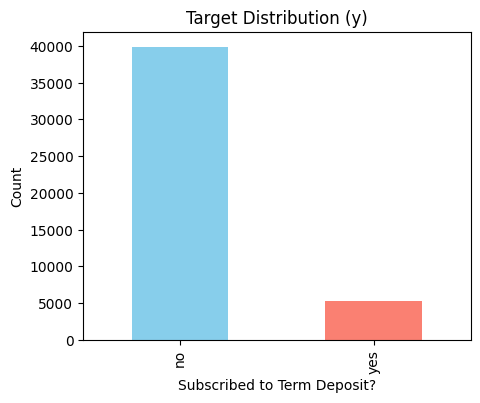

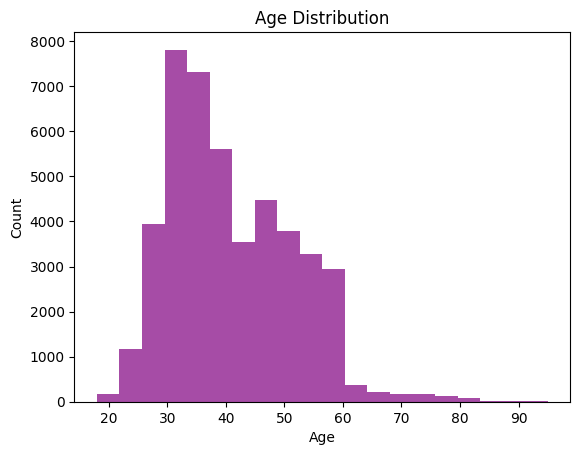

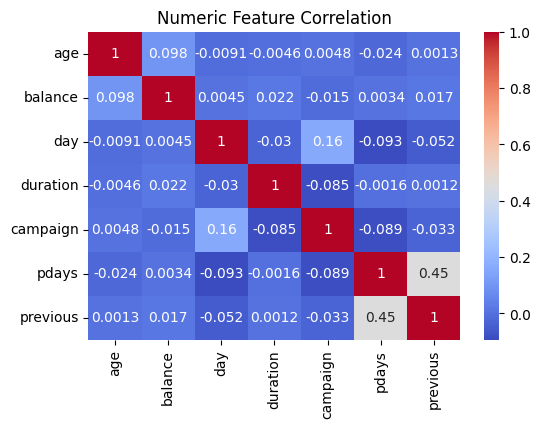

In [1]:
# Cell 1: Load data and perform EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("bank-full.csv", sep=';')

# Basic info
print("Dataset shape:", df.shape)
print(df.info())

# Missing values check
print("\nMissing values:\n", df.isnull().sum())

# Target distribution
plt.figure(figsize=(5,4))
df['y'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Target Distribution (y)")
plt.xlabel("Subscribed to Term Deposit?")
plt.ylabel("Count")
plt.show()

# Age distribution
plt.hist(df['age'], bins=20, color='purple', alpha=0.7)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Correlation heatmap for numeric columns
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap='coolwarm')
plt.title("Numeric Feature Correlation")
plt.show()


In [ ]:
# Cell 2: Preprocess categorical data and split train/test
from sklearn.model_selection import train_test_split

# Drop duration as it gives data leakage
df = df.drop(columns=['duration'])
df['y'] = df['y'].map({'yes':1, 'no':0})

# One-hot encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("After encoding:", df_encoded.shape)

# Define features and target
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

# Normalize numeric features (for faster convergence)
X = (X - X.mean()) / X.std()

# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)


After encoding: (45211, 42)
Train shape: (36168, 41) | Test shape: (9043, 41)


In [ ]:
# Cell 3: Implement Logistic Regression (vectorized)
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, n_iter=500, verbose=False):
        self.lr = lr
        self.n_iter = n_iter
        self.verbose = verbose

    def sigmoid(self, z):
        z = np.clip(z, -250, 250)  # prevent overflow
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = X.values
        y = y.values.reshape(-1, 1)
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for i in range(self.n_iter):
            linear = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear)

            # Gradient calculation
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Weight update
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            if self.verbose and i % 100 == 0:
                loss = -np.mean(y*np.log(y_pred+1e-12) + (1-y)*np.log(1-y_pred+1e-12))
                print(f"Iteration {i}/{self.n_iter}, Loss={loss:.4f}")

    def predict_proba(self, X):
        X = X.values
        return self.sigmoid(np.dot(X, self.weights) + self.bias).ravel()

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

# Train model
model = LogisticRegressionScratch(lr=0.05, n_iter=1000)
model.fit(X_train, y_train)
print(" Training complete!")


 Training complete!


In [ ]:
# Cell 4: Compute all evaluation metrics manually

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true==1) & (y_pred==1))
    fp = np.sum((y_true==0) & (y_pred==1))
    return tp / (tp + fp + 1e-12)

def recall(y_true, y_pred):
    tp = np.sum((y_true==1) & (y_pred==1))
    fn = np.sum((y_true==1) & (y_pred==0))
    return tp / (tp + fn + 1e-12)

def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r + 1e-12)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Metrics
acc = accuracy(y_test.values, y_pred)
prec = precision(y_test.values, y_pred)
rec = recall(y_test.values, y_pred)
f1_score = f1(y_test.values, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Accuracy: 0.8900
Precision: 0.6569
Recall: 0.1842
F1 Score: 0.2878


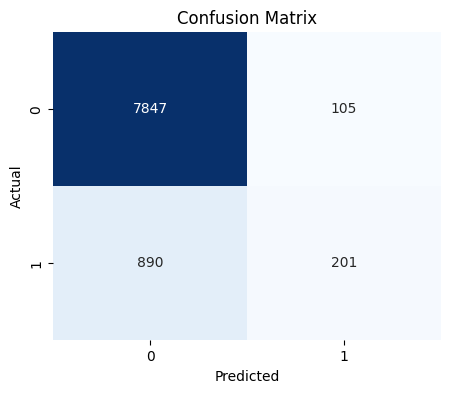

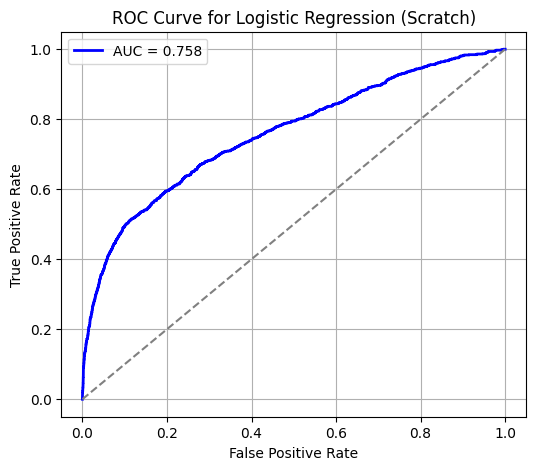

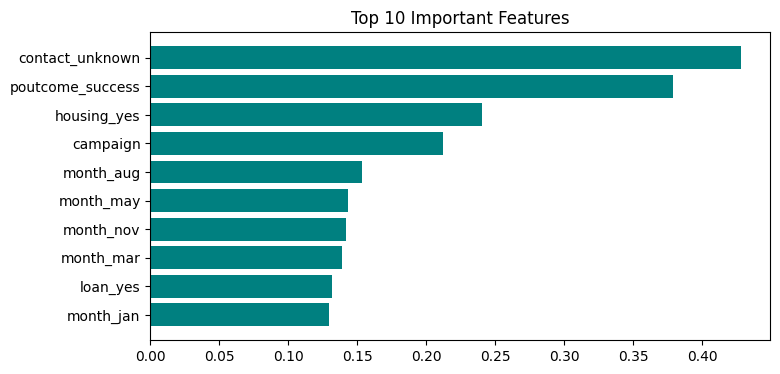

In [ ]:
# Cell 5: Visualization of results
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression (Scratch)")
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance
importance = np.abs(model.weights.ravel())
sorted_idx = np.argsort(importance)[-10:][::-1]
plt.figure(figsize=(8,4))
plt.barh(np.array(X_train.columns)[sorted_idx], importance[sorted_idx], color='teal')
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# ================================================
#  Experiment: Effect of 'duration' on performance
# ================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv("bank-full.csv", sep=';')

# Encode target
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# One-hot encode categorical features
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Separate features and target
X_with_duration = df_encoded.drop(columns=['y'])
y = df_encoded['y']

# Standardize numeric features
scaler = StandardScaler()
X_with_duration = pd.DataFrame(scaler.fit_transform(X_with_duration), columns=X_with_duration.columns)

# Train-test split
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_with_duration, y, test_size=0.2, random_state=42)

# Model A (with duration)
model_a = LogisticRegression(max_iter=1000)
model_a.fit(X_train_a, y_train_a)
y_pred_a = model_a.predict(X_test_a)

# Now drop duration
if 'duration' in df.columns:
    df = df.drop(columns=['duration'])
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded2 = pd.get_dummies(df, columns=cat_cols, drop_first=True)
X_no_duration = df_encoded2.drop(columns=['y'])
y2 = df_encoded2['y']

# Standardize again
X_no_duration = pd.DataFrame(scaler.fit_transform(X_no_duration), columns=X_no_duration.columns)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_no_duration, y2, test_size=0.2, random_state=42)

# Model B (without duration)
model_b = LogisticRegression(max_iter=1000)
model_b.fit(X_train_b, y_train_b)
y_pred_b = model_b.predict(X_test_b)

# Compute metrics
def evaluate(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

results_a = evaluate(y_test_a, y_pred_a)
results_b = evaluate(y_test_b, y_pred_b)

# Show results
print(" Model A (with 'duration') Metrics:")
for k,v in results_a.items():
    print(f"{k}: {v:.4f}")

print("\n Model B (without 'duration') Metrics:")
for k,v in results_b.items():
    print(f"{k}: {v:.4f}")


 Model A (with 'duration') Metrics:
Accuracy: 0.8988
Precision: 0.6544
Recall: 0.3419
F1-Score: 0.4491

 Model B (without 'duration') Metrics:
Accuracy: 0.8901
Precision: 0.6678
Recall: 0.1769
F1-Score: 0.2797
